In [160]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

Add Resolutions and Stuff
-------------------------

In [161]:
#En10k -- vector for 10,000 yrs of (n,p)
#Enel -- vector for 10,000 yrs of elastics
#Enlow -- vector for 1 yr of (n,p)
#Enel1x -- vector for 1 yr of elastics

In [162]:
#get some cross section data
import ENDF6
f = open('data/jendl5_3He.endf6')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # Elastic
x, y = ENDF6.read_table(sec)

sec_np = ENDF6.find_section(lines, MF=3, MT=103)  # Elastic
xnp, ynp = ENDF6.read_table(sec_np)

In [163]:
#densities to convert to macroscopic xn
rholhe3 = 0.0792 #g/cm^3
masshe3 = 3.016 #molar mass
nhe3 = (rholhe3/masshe3)*co.N_A

In [164]:
ESigElMeV = x/1e6
SigElMeV = y*1e-24*nhe3

ESigMeV = xnp/1e6
SigMeV = ynp*1e-24*nhe3

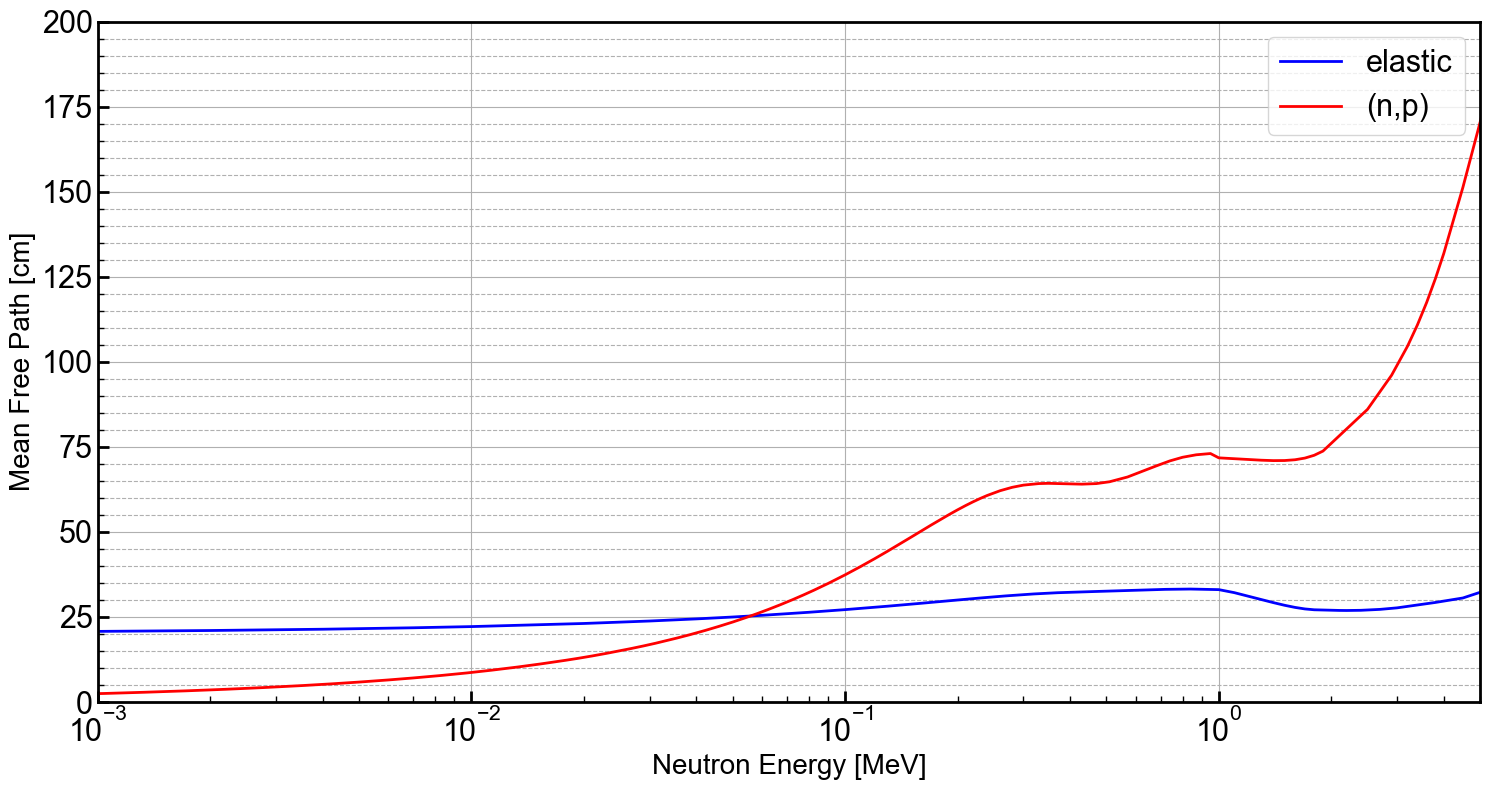

In [165]:
#adding code to create JURP figure
#calculating the mean free path
elastic_mean_free_path = 1/SigElMeV
np_mean_free_path = 1/SigMeV

# set up plot
fig, ax = plt.subplots(1,1,figsize=(15,8))
# label and style things
ax.set_xlabel(r'Neutron Energy [MeV]', fontsize=20)
ax.set_ylabel('Mean Free Path [cm]', fontsize=20)
#ax.set_title('Mean Free Path of Neutrons in 3-He', fontsize=20)
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.set_xlim(1e-3, 5.0)
ax.set_ylim(0, 200)
ax.set_xscale('log')

# plot values
ax.plot(ESigElMeV, elastic_mean_free_path, color = "blue", label = "elastic")
ax.plot(ESigMeV, np_mean_free_path, color = "red", label = "(n,p)")
ax.legend()
plt.tight_layout()
#fig.savefig('')
plt.show()

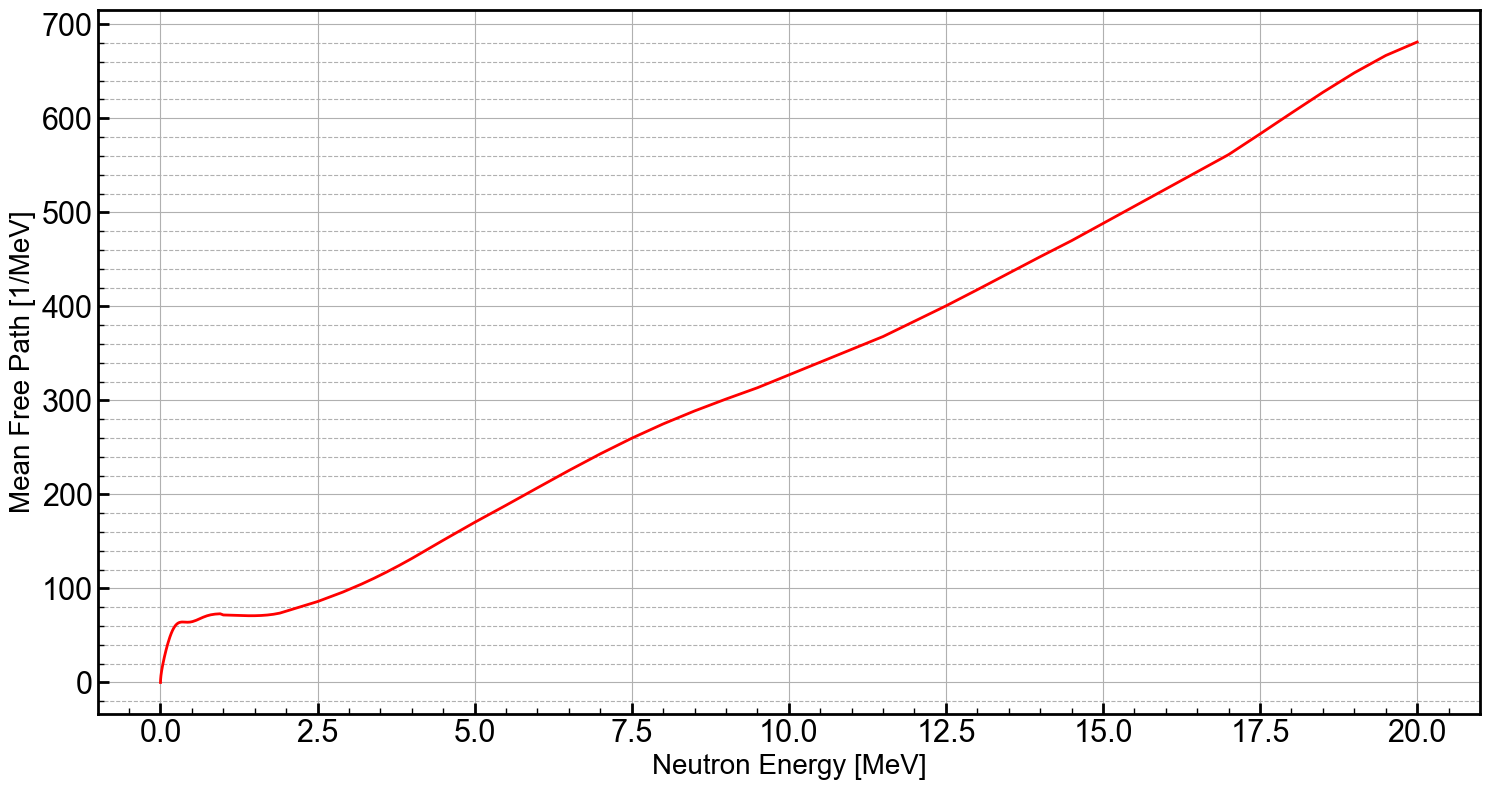

In [166]:
#adding code to create JURP figure
#calculating the mean free path
mean_free_path = 1/SigMeV

# set up plot
fig, ax = plt.subplots(1,1,figsize=(15,8))
# label and style things
ax.set_xlabel(r'Neutron Energy [MeV]', fontsize=20)
ax.set_ylabel('Mean Free Path [1/MeV]', fontsize=20)
#ax.set_title('Mean Free Path of Neutrons in 3-He', fontsize=20)
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

# plot values
ax.plot(ESigMeV, mean_free_path, color = "red")
plt.tight_layout()
#fig.savefig('')
plt.show()